# Assignment 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import datetime

from mpl_toolkits.mplot3d import Axes3D
from plyfile import PlyData, PlyElement

In [2]:
matplotlib.style.use('ggplot')

In [3]:
reduce_factor = 100

# Every 100 data samples, we save 1. If things run too
# slow, try increasing this number. If things run too fast,
# try decreasing it... =)

In [4]:
plyfile = PlyData.read('stanford_armadillo.ply')
armadillo = pd.DataFrame({
  'x':plyfile['vertex']['z'][::reduce_factor],
  'y':plyfile['vertex']['x'][::reduce_factor],
  'z':plyfile['vertex']['y'][::reduce_factor]
})


In [4]:
import numpy as np
from sklearn.decomposition import PCA

In [5]:
pca = PCA (n_components=2, svd_solver='full')
pca.fit_transform(armadillo) 

array([[ 23.425716  , -11.34514281],
       [-45.77840237,  62.6568348 ],
       [-46.38782551,  63.60486895],
       ..., 
       [ -4.55717278,  -2.76426412],
       [ 80.42534909,  41.38446757],
       [-65.49719012, -46.46272106]])

In [6]:
def do_PCA(armadillo):
  #
  # TODO: Write code to import the libraries required for PCA.
    import numpy as np
    from sklearn.decomposition import PCA
    
  # Then, train your PCA on the armadillo dataframe. Finally,
  # drop one dimension (reduce it down to 2D) and project the
  # armadillo down to the 2D principal component feature space.
  
    pca = PCA (n_components=2, svd_solver='full')
    pca.fit(armadillo)   
    
  # NOTE: Be sure to RETURN your projected armadillo! 
  # (This projection is actually stored in a NumPy NDArray and
  # not a Pandas dataframe, which is something Pandas does for
  # you automatically. =)

    return pca.transform(armadillo)

In [7]:
def do_RandomizedPCA(armadillo):
  #
  # TODO: Write code to import the libraries required for
  # RandomizedPCA. Then, train your RandomizedPCA on the armadillo
  # dataframe. Finally, drop one dimension (reduce it down to 2D)
  # and project the armadillo down to the 2D principal component
  # feature space.
    
    import numpy as np
    from sklearn.decomposition import RandomizedPCA
    
    pca = RandomizedPCA (n_components=2)
    pca.fit(armadillo)
    
  # NOTE: Be sure to RETURN your projected armadillo! 
  # (This projection is actually stored in a NumPy NDArray and
  # not a Pandas dataframe, which is something Pandas does for
  # you automatically. =)
  #
  # NOTE: SKLearn deprecated the RandomizedPCA method, but still
  # has instructions on how to use randomized (truncated) method
  # for the SVD solver. To find out how to use it, check out the
  # full docs here:
  # http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
  #
  # .. your code here ..

    return pca.transform(armadillo)

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_title('Armadillo 3D')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.scatter(armadillo.x, armadillo.y, armadillo.z, c='green', marker='.', alpha=0.75)

In [9]:
# Time the execution of PCA 5000x
# PCA is ran 5000x in order to help decrease the potential of rogue
# processes altering the speed of execution.
t1 = datetime.datetime.now()
for i in range(5000): pca = do_PCA(armadillo)
time_delta = datetime.datetime.now() - t1

# Render the newly transformed PCA armadillo!
if not pca is None:
  fig = plt.figure()
  ax = fig.add_subplot(111)
  ax.set_title('PCA, build time: ' + str(time_delta))
  ax.scatter(pca[:,0], pca[:,1], c='blue', marker='.', alpha=0.75)

/Users/leesoohyun/anaconda/lib/python3.5/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)
/Users/leesoohyun/anaconda/lib/python3.5/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)
/Users/leesoohyun/anaconda/lib/python3.5/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA

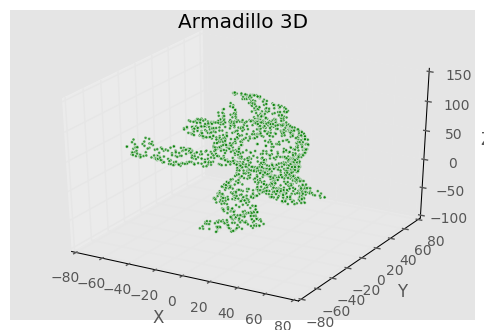

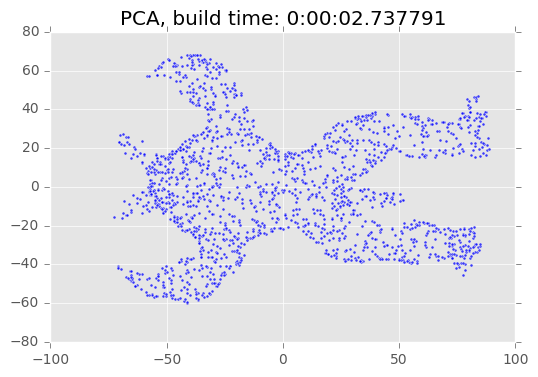

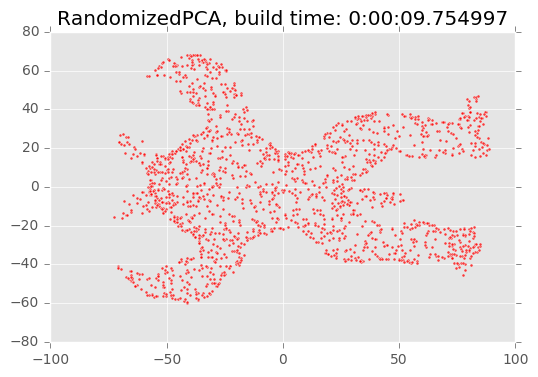

In [10]:
# Time the execution of rPCA 5000x
t1 = datetime.datetime.now()
for i in range(5000): rpca = do_RandomizedPCA(armadillo)
time_delta = datetime.datetime.now() - t1

# Render the newly transformed RandomizedPCA armadillo!
if not rpca is None:
  fig = plt.figure()
  ax = fig.add_subplot(111)
  ax.set_title('RandomizedPCA, build time: ' + str(time_delta))
  ax.scatter(rpca[:,0], rpca[:,1], c='red', marker='.', alpha=0.75)


plt.show()

# Assignment 2

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import assignment2_helper as helper

In [18]:
scaleFeatures = False

In [19]:
data = pd.read_csv('kidney_disease.csv')
data = data.drop('id',axis=1).dropna(how='any',axis=0)
wc = data['wc'].str.strip('\t')
data = data.drop('wc',axis=1)
data['wc'] = pd.Series(wc,index=data.index)
df = data

In [9]:
labels = ['red' if i=='ckd' else 'green' for i in df.classification]

In [6]:
df = df[['bgr','wc','rc']]

In [7]:
df.wc = df.wc.astype('int')
df.rc = df.rc.astype('float')
df.dtypes

/Users/leesoohyun/anaconda/lib/python3.5/site-packages/pandas/core/generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


bgr               float64
wc                  int64
rc                float64
classification     object
dtype: object

In [8]:
df.describe()

,bgr,wc,rc
count,158.000000,158.000000,158.000000
mean,131.341772,8475.949367,4.891772
std,64.939832,3126.880181,1.019364
min,70.000000,3800.000000,2.100000
25%,97.000000,6525.000000,4.500000
50%,115.500000,7800.000000,4.950000
75%,131.750000,9775.000000,5.600000
max,490.000000,26400.000000,8.000000


In [14]:
if scaleFeatures: df = helper.scaleFeatures(df)

In [16]:
# TODO: PCA Operates based on variance. The variable with the greatest
# variance will dominate. Go ahead and peek into your data using a
# command that will check the variance of every feature in your dataset.
# Print out the results. Also print out the results of running .describe
# on your dataset.

from sklearn.decomposition import PCA
pca = PCA(n_components = 2, svd_solver = 'full')
pca.fit(df)
T=pca.transform(df)

ValueError: could not convert string to float: 'notckd'

In [166]:
# Plot the transformed data as a scatter plot. Recall that transforming
# the data will result in a NumPy NDArray. You can either use MatPlotLib
# to graph it directly, or you can convert it to DataFrame and have pandas
# do it for you.

ax = helper.drawVectors(T, pca.components_, df.columns.values, plt, scaleFeatures)
T = pd.DataFrame(T)
T.columns = ['component1', 'component2']
T.plot.scatter(x='component1', y='component2', marker='o',c=['r','b','g','b'] ,alpha=0.75, ax=ax, legend=True)
plt.show()

AttributeError: 'PCA' object has no attribute 'components_'

In [167]:
print(pca.explained_variance_)

AttributeError: 'PCA' object has no attribute 'explained_variance_'

In [168]:
T.describe()

,component1,component2
count,1.580000e+02,1.580000e+02
mean,-2.950101e-13,-5.435877e-15
std,3.126911e+03,6.346291e+01
min,-4.676148e+03,-1.072710e+02
25%,-1.951026e+03,-3.430320e+01
50%,-6.761801e+02,-1.424838e+01
75%,1.298772e+03,4.909817e+00
max,1.792441e+04,3.431202e+02
